# Project 1: Driving Accidents and Drivers' Ages (Work in Groups) #

The government is considering to introduce new policies for young drivers (passenger restrictions, night driving restrictions, etc) in order to reduce the number of accidents produced by young drivers. A crucial point in the debate is to have some rigid information about whether the younger age is actually correlated with a higher accident rate. Therefore, they are interested to study such statistics from countries where driving is permitted from a young age and produce data that they can present to the debate.

You have been tasked to look into the above matter, and after searching open government data you find the following data that relate the driving age with accidents (fatal accidents, or any type of accidents). The data date back in 1998, but are considered representative.

This is what you data looks like:

|Age group              |Age min|Age max  |Drivers licensed | Fatal accidents | All accidents |
|:--------------------- |:-----:|:-------:|:---------------:|:---------------:|:-------------:|
|Under 16 years old     |-      | 15      | 31000           | 500             | 120000        |
|16 years old           |16     | 16      | 1708000         | 1200            | 620000        |
|17 years old           |17     | 17      | 2436000         | 1200            | 720000        |
|18 years old           |18     | 18      | 2868000         | 1900            | 780000        |
|19 years old           |19     | 19      | 2941000         | 1600            | 700000        |
|19 years old and under |-      | 19      | 9984000         | 6400            | 2940000       |
|. |. |. |. |. |. |
|20 years old           |20     | 20      | 3048000         | 1500            | 630000        |
|21 years old           |21     | 21      | 3093000         | 1500            | 600000        |
|22 years old           |22     | 22      | 3022000         | 1500            | 550000        |
|23 years old           |23     | 23      | 3209000         | 1300            | 520000        |
|24 years old           |24     | 24      | 3157000         | 1300            | 500000        |
|. |. |. |. |. |. |
|20 to 24 years old     |20     | 24      | 15529000        | 7100            | 2800000       |
|25 to 34 years old     |25     | 34      | 37265000        | 11900           | 4900000       |
|35 to 44 years old     |35     | 44      | 41857000        | 11300           | 4440000       |
|45 to 54 years old     |45     | 54      | 33662000        | 7700            | 2940000       |
|55 to 64 years old     |55     | 64      | 21337000        | 4600            | 1570000       |
|65 to 74 years old     |65     | 74      | 15244000        | 3600            | 1010000       |
|75 years old and over  |75     | -       | 10570000        | 3500            | 710000        |

*Source: National Safety Council, USA.*

We will follow the OSEMN approach as introduced in Lecture 1:

* **O**btain data of good quality
* **S**crub - examine, clean and complete the data
* **E**xplore - Understand what kind of patterns are there in the data
* **M**odel - Create predictive models from the data
* i**N**terpret - Present and explain your findings

Go through the notebook and respond to all the questions.

## Import Data

Our data is given in a CSV file, so we will use the `pandas.read_csv()` function to import all data as a list of dictionaries into a data frame.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline

#Abrir el archivo con los datos
data = pd.read_csv("Data.csv")
data.fillna(0, inplace = True)

#imprimir datos originales
print(data.to_string())

                 Age group  Age min  Age max  Drivers licensed  Fatal accidents  All accidents
0       Under 16 years old      0.0     15.0             31000              500         120000
1             16 years old     16.0     16.0           1708000             1200         620000
2             17 years old     17.0     17.0           2436000             1200         720000
3             18 years old     18.0     18.0           2868000             1900         780000
4             19 years old     19.0     19.0           2941000             1600         700000
5   19 years old and under      0.0     19.0           9984000             6400        2940000
6             20 years old     20.0     20.0           3048000             1500         630000
7             21 years old     21.0     21.0           3093000             1500         600000
8             22 years old     22.0     22.0           3022000             1500         550000
9             23 years old     23.0     23.0      

### Question 1

<font color="blue">Observe that there are some values missing in the "Age min" and "Age max" series. These missing values can potentially create problems. Decide what you want to do with these values. For example you could use domain knowledge to fill in the values with an realistic estimate, or discard whole rows of your data... Justify your choices. Remember that the younger ages are important, so you should be careful not to discard information that might potentially be useful.</font>

In [2]:
# Your Code Here
#Índices en los que hay datos faltantes para las columnas Age min y Age max
index_min = data[data['Age min']==0].index.values
index_max = data[data['Age max']==0].index.values

#Si sí hay datos faltantes entonces se pueden agregar
if index_min.size:
    data.loc[index_min[0], 'Age min'] = '15'
    data.loc[index_min[1], 'Age min'] = '15'
    data.loc[index_min[0], 'Age group'] = '15 years old'
if index_max.size:
    data.loc[index_max[0], 'Age max'] = '84'
    data.loc[index_max[0], 'Age group'] = '75 to 84 years old'

#Se trasforman los datos en números enteros
data['Age min'] = data['Age min'].astype(int)
data['Age max'] = data['Age max'].astype(int)
data['Drivers licensed'] = data['Drivers licensed'].astype(int)
data['Fatal accidents'] = data['Fatal accidents'].astype(int)
data['All accidents'] = data['All accidents'].astype(int)

#imprimir respuesta
print(data.to_string())

                 Age group  Age min  Age max  Drivers licensed  Fatal accidents  All accidents
0             15 years old       15       15             31000              500         120000
1             16 years old       16       16           1708000             1200         620000
2             17 years old       17       17           2436000             1200         720000
3             18 years old       18       18           2868000             1900         780000
4             19 years old       19       19           2941000             1600         700000
5   19 years old and under       15       19           9984000             6400        2940000
6             20 years old       20       20           3048000             1500         630000
7             21 years old       21       21           3093000             1500         600000
8             22 years old       22       22           3022000             1500         550000
9             23 years old       23       23      

### Question 2

<font color="blue">Use the "average age" to represent each of the age groups. E.g. the age group of "20 to 24 years old" could be represented by their average age of 22.</font>

In [3]:
# Your Code Here
#Agregar columna con promedios para cada grupo
promedios = []

#Se itera sobre cada rango de edad  y se saca el promedio
for indx in range(0,data['Age group'].size): 
    avg = (data['Age min'][indx] + data['Age max'][indx])/2 #Cálculo del promedio
    promedios.append(avg) #Agrega el valor a "promedios"

data.insert(3, 'Average age', promedios) #añade la columna completa en la tabla

#imprimir respuesta
print(data.to_string())

                 Age group  Age min  Age max  Average age  Drivers licensed  Fatal accidents  All accidents
0             15 years old       15       15         15.0             31000              500         120000
1             16 years old       16       16         16.0           1708000             1200         620000
2             17 years old       17       17         17.0           2436000             1200         720000
3             18 years old       18       18         18.0           2868000             1900         780000
4             19 years old       19       19         19.0           2941000             1600         700000
5   19 years old and under       15       19         17.0           9984000             6400        2940000
6             20 years old       20       20         20.0           3048000             1500         630000
7             21 years old       21       21         21.0           3093000             1500         600000
8             22 years old  

### Question 3

<font color="blue">Select the age groups that you will use for the rest of the analysis, and remove the rest from your dataset. You would want to make sure that you do not have repeated information, and that you do not discard any potentially useful data. Justify your choices.</font>

In [4]:
# Your Code Here
#Se crean los grupos con rango de edades deseadas
age_group = '15 to 24 years old'
age_min = 15
age_max = 24
avg_age = (age_min + age_max)/2
drivers_lic = 0
fatal_acc = 0
all_acc = 0

#Se elimina la fila "19 years old and under" para evitar datos repetidos
data = data.drop(5).reset_index(drop=True)

#Se unifican los datos en un único rango de 15 a 24
for indx in range(0,10):
    drivers_lic = drivers_lic + data['Drivers licensed'][indx]
    fatal_acc = fatal_acc + data['Fatal accidents'][indx]
    all_acc = all_acc + data['All accidents'][indx]

#Se agrega el grupo a los datos
data.loc[0] = [age_group, age_min, age_max, avg_age,
                         drivers_lic, fatal_acc, all_acc]

#Se eliminan las filas indicadas por los índices dentro 'filas_elim'
filas_elim = range(1,11)
data = data.drop(filas_elim).reset_index(drop=True)

#imprimir respuesta
print(data.to_string())

            Age group  Age min  Age max  Average age  Drivers licensed  Fatal accidents  All accidents
0  15 to 24 years old       15       24         19.5          25513000            13500        5740000
1  25 to 34 years old       25       34         29.5          37265000            11900        4900000
2  35 to 44 years old       35       44         39.5          41857000            11300        4440000
3  45 to 54 years old       45       54         49.5          33662000             7700        2940000
4  55 to 64 years old       55       64         59.5          21337000             4600        1570000
5  65 to 74 years old       65       74         69.5          15244000             3600        1010000
6  75 to 84 years old       75       84         79.5          10570000             3500         710000


### Question 4

<font color="blue">What percentage of accidents is each age responsible for? Make a plot of your findings and provide an interpretation. Then give an *approximate* estimation of how many Fatal accidents are caused by people aged 42 years, based on your plot.</font>

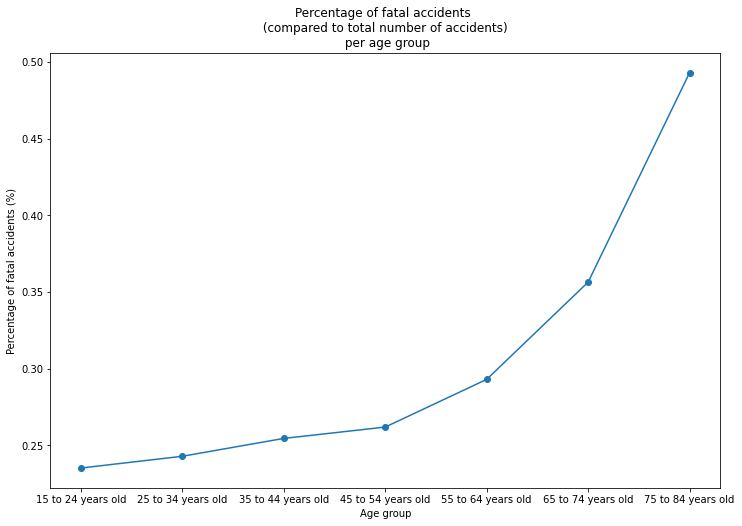

In [5]:
# Your Code Here
#Porcentaje de accidentes por grupo
porcentajes_tot = []

for indx in range(0,data['Age group'].size):
    perc = data['Fatal accidents'][indx]*100/data['All accidents'][indx]
    porcentajes_tot.append(perc)

data.insert(7, 'Fatality rate (%)', porcentajes_tot)

#Se crea el gráfico de puntos
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

plt.plot(data['Age group'], data['Fatality rate (%)'], marker='o')

plt.xticks(fontsize=10)
plt.title("Percentage of fatal accidents \n (compared to total number of accidents) \n per age group")
plt.xlabel("Age group")
plt.ylabel("Percentage of fatal accidents (%)")

plt.show()

In [6]:
#Interpolación de los datos
spl = make_interp_spline(data['Average age'],data['Fatality rate (%)'], k=3)

#Según el gráfico, # de accidentes fatales por personas de 42 años
indx = int(data[data['Age group']=='35 to 44 years old'].index.values)
fatal_42 = spl(42)*data['All accidents'][indx]/100

print("An approximate estimation of how many fatal accidents are",
      "caused by people aged 42 years, based on the plot, is:",
      round(fatal_42),"fatal accidents.")
print('---------------------------------------------------------------------------')

An approximate estimation of how many fatal accidents are caused by people aged 42 years, based on the plot, is: 11362 fatal accidents.
---------------------------------------------------------------------------


### Question 5

<font color="blue">The numbers we have reported up to now are absolute numbers: e.g. we just reported "all accidents produced by all people aged 42 years old".</font>

<font color="blue">Observe that there is a very different number of drivers in each age group. It is not the same to produce 10 accidents between 100 licensed drivers, or 10 accidents between 1 million licensed drivers...</font>

<font color="blue">What if we wanted to see how many accidents a single person aged 42 is responsible for on average?</font>

<font color="blue">Obviously, the more licensed drivers in an age group, the more accidents will be produced. We want to see what is the effect of the **age** of the driver in the generation of accidents (not the number of drivers in an age group), so we want to remove any influence due to the size of each age group.</font>

<font color="blue">Calculate the average number of accidents per person for each age group.</font>

In [7]:
# Your Code Here
#Cálculo de accidentes por conductor (doble normlizacion)
acc_person = []

for indx in range(data['Age group'].size):
    num = data['All accidents'][indx]/data['Drivers licensed'][indx]
    acc_person.append(num)

data.insert(8, 'Avg accidents pp', acc_person)

#imprimir respuesta
print(data.to_string())

            Age group  Age min  Age max  Average age  Drivers licensed  Fatal accidents  All accidents  Fatality rate (%)  Avg accidents pp
0  15 to 24 years old       15       24         19.5          25513000            13500        5740000           0.235192          0.224983
1  25 to 34 years old       25       34         29.5          37265000            11900        4900000           0.242857          0.131491
2  35 to 44 years old       35       44         39.5          41857000            11300        4440000           0.254505          0.106075
3  45 to 54 years old       45       54         49.5          33662000             7700        2940000           0.261905          0.087339
4  55 to 64 years old       55       64         59.5          21337000             4600        1570000           0.292994          0.073581
5  65 to 74 years old       65       74         69.5          15244000             3600        1010000           0.356436          0.066256
6  75 to 84 years ol

### Question 6

<font color="blue">Now plot the relationship between the average number of accidents per person vs the representative age of the corresponding age group. What do you observe? Provide a possible explanation for any issues you spot.</font>

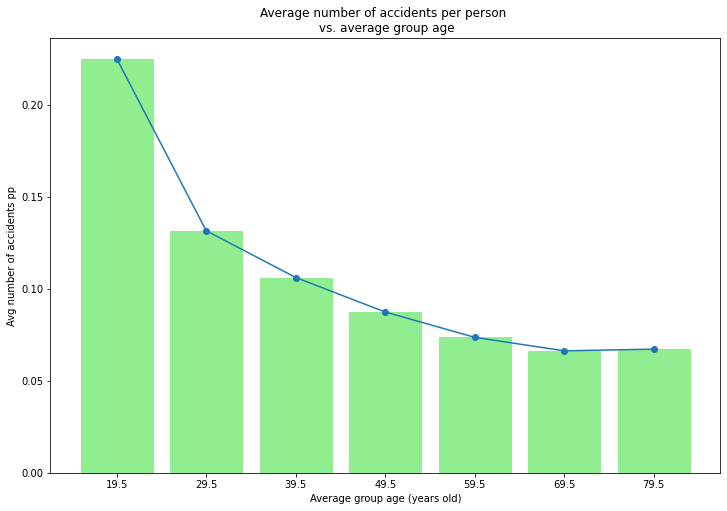

In [8]:
# Your Code Here
#Se define tamaño de la figura
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

#Se crea el gráfico de barras de accidentes en promedio hay por persona en cada grupo de edad (apartado 5)
bar_data = plt.bar(data['Average age'].astype(str), data['Avg accidents pp'])

#Se crea gráfico de puntos
plt.plot(data['Average age'].astype(str), data['Avg accidents pp'], marker = 'o')

#Se define el color de las barras. Si es más de un accidente por persona será rojo, si es menos será verde.
for indx in range(0,data['Age group'].size):
    if  data['Avg accidents pp'][indx] > 1:
        bar_data[indx].set_color('lightcoral')
    else:
        bar_data[indx].set_color('lightgreen')

plt.title("Average number of accidents per person \n vs. average group age")
plt.xlabel("Average group age (years old)")
plt.ylabel("Avg number of accidents pp")
plt.show()

### Question 7

<font color="blue">Fit a model to this relationship, and predict how many accidents are people of 19 and 43 years old responsible for using your model. You will have to decide what kind of model better fits the data.</font>

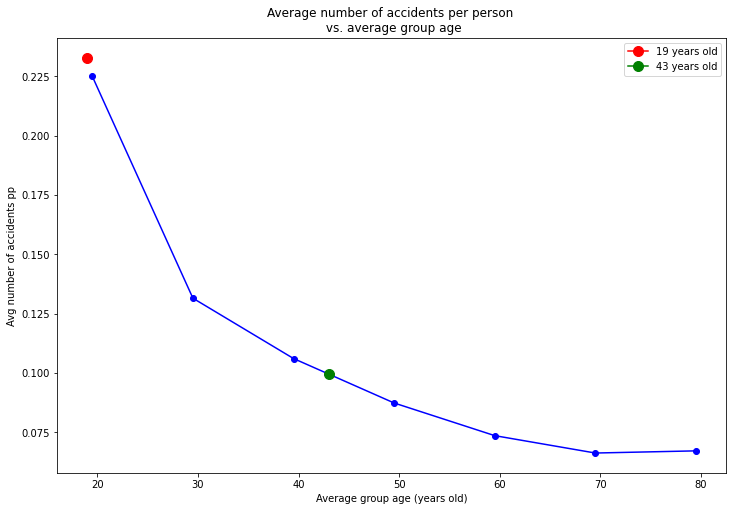

According to the model used above, 19 years old people are responsible for: 0.2328 accidents per driver.
---------------------------------------------------------------------------
According to the model used above, 43 years old people are responsible for: 0.0997 accidents per driver.
---------------------------------------------------------------------------


In [24]:
# Your Code here.
#Interpolación de los datos para encontrar el mejor modelo
#Se utiliza un polinomio de grado 3
spl = make_interp_spline(data['Average age'],data['Avg accidents pp'], k=3)

#Según el modelo el # de accidentes por personas de 19 años
acc_19 = spl(19)*1

#Según el modelo el # de accidentes por personas de 43 años
acc_43 = spl(43)*1

#Se define tamaño de la figura
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(8)

#Se crea gráfico de puntos
plt.plot(data['Average age'], data['Avg accidents pp'], marker = 'o', color = 'b')
plt.plot(19, acc_19, marker = 'o', color = 'r', ms = 10, label = "19 years old")
plt.plot(43, acc_43, marker = 'o', color = 'g', ms = 10, label = "43 years old")

plt.legend(loc='upper right')
plt.title("Average number of accidents per person \n vs. average group age")
plt.xlabel("Average group age (years old)")
plt.ylabel("Avg number of accidents pp")
plt.show()

#Predicción para las edades indicadas
print("According to the model used above, 19 years old people are responsible for:",
      round(acc_19,4), "accidents per driver.")
print('---------------------------------------------------------------------------')
print("According to the model used above, 43 years old people are responsible for:",
      round(acc_43,4), "accidents per driver.")
print('---------------------------------------------------------------------------')

### Question 8

<font color="blue">Prepare a presentation with your findings, explaining your analysis, your decisions and assumptions made.</font>

**PRESENTATION EXPECTED IN SEPARATE FORMAT**